# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | alta floresta
Processing Record 3 of Set 1 | sibu
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | mazyr
Processing Record 7 of Set 1 | srandakan
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | alugan
Processing Record 16 of Set 1 | beihai
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | pevek
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 23 of Set 1 | bil

Processing Record 39 of Set 4 | seydi
Processing Record 40 of Set 4 | omboue
Processing Record 41 of Set 4 | saskylakh
City not found. Skipping...
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | gazanjyk
Processing Record 44 of Set 4 | corinth
Processing Record 45 of Set 4 | loralai
Processing Record 46 of Set 4 | prado
Processing Record 47 of Set 4 | lahij
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | koygorodok
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | michalovce
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | bambous virieux
City not found. Skipping...
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | zaraza
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | ust-kut
Processing Record 11 of Set 5 | mys shmidta
Processing Record 12 of Set 5 | lenins

Processing Record 31 of Set 8 | chachapoyas
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | jaciara
Processing Record 34 of Set 8 | balkhash
Processing Record 35 of Set 8 | kayerkan
Processing Record 36 of Set 8 | pasco
Processing Record 37 of Set 8 | namie
Processing Record 38 of Set 8 | iwaki
Processing Record 39 of Set 8 | ramsar
Processing Record 40 of Set 8 | pringsewu
Processing Record 41 of Set 8 | tirumullaivasal
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | hovd
Processing Record 45 of Set 8 | san carlos de bariloche
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | benguela
Processing Record 48 of Set 8 | aripuana
Processing Record 49 of Set 8 | lar
Processing Record 1 of Set 9 | les cayes
Processing Record 2 of Set 9 | yazd
Processing Record 3 of Set 9 | poum
Processing Record 4 of Set 9 | taixing
Processing Record 5 of Set 9 | gubkinskiy
Processing Record 6 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['bluff',
  'alta floresta',
  'sibu',
  'namibe',
  'cape town',
  'mazyr',
  'srandakan',
  'rikitea',
  'saint-philippe',
  'hilo',
  'souillac',
  'saldanha',
  'tuktoyaktuk',
  'kapaa',
  'alugan',
  'beihai',
  'faanui',
  'pevek',
  'hermanus',
  'kodiak',
  'jamestown',
  'kaitangata',
  'bilibino',
  'novobirilyussy',
  'pore',
  'qaanaaq',
  'deputatskiy',
  'wasilla',
  'dingle',
  'ushtobe',
  'veraval',
  'rocha',
  'morteni',
  'albany',
  'pisco',
  'rostovka',
  'lorengau',
  'tasiilaq',
  'makat',
  'gorele',
  'atuona',
  'new norfolk',
  'punta arenas',
  'nikolskoye',
  'kaohsiung',
  'dikson',
  'smithers',
  'norman wells',
  'pouebo',
  'mahebourg',
  'high level',
  'carnarvon',
  'tiznit',
  'hobart',
  'cherskiy',
  'severo-kurilsk',
  'ostrovnoy',
  'castro',
  'samarai',
  'kamenka',
  'ushuaia',
  'sambava',
  'mataura',
  'itaituba',
  'upernavik',
  'krasnokamensk',
  'buraydah',
  'moree',
  'thompson',
  'nuuk',
  'shimoda',
  'gushi',
  'busse

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,73,NZ,1579917515,63,-46.60,168.33,66.99,5.01
1,alta floresta,90,NO,1579917516,85,69.97,23.27,19.40,8.05
2,sibu,75,MY,1579917516,83,2.30,111.82,80.60,4.70
3,namibe,72,AO,1579917462,75,-15.20,12.15,74.10,7.47
4,cape town,0,CL,1579917516,27,-36.41,-71.90,77.00,8.05


In [7]:
weather_dataframe.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,73,NZ,1579917515,63,-46.60,168.33,66.99,5.01
1,alta floresta,90,NO,1579917516,85,69.97,23.27,19.40,8.05
2,sibu,75,MY,1579917516,83,2.30,111.82,80.60,4.70
3,namibe,72,AO,1579917462,75,-15.20,12.15,74.10,7.47
4,cape town,0,CL,1579917516,27,-36.41,-71.90,77.00,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
time.strftime('%x')

'01/24/20'

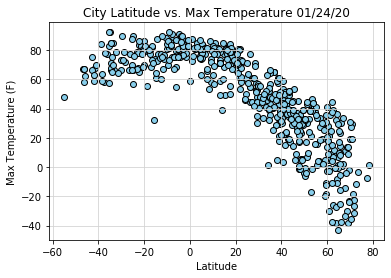

In [10]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

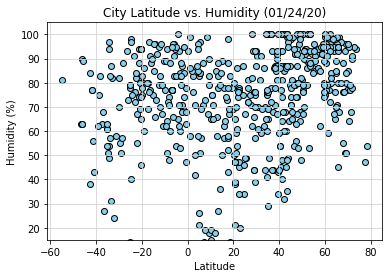

In [11]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

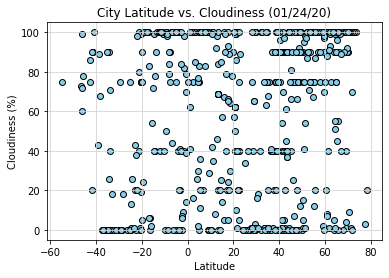

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

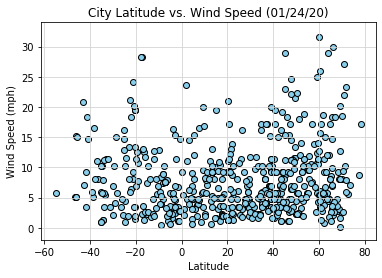

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [ ]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#Southern Hemisphere (less than 0 degrees latitude)

In [14]:
north = weather_dataframe[weather_dataframe["Lat"] >= 0]
north.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,alta floresta,90,NO,1579917516,85,69.97,23.27,19.40,8.05
2,sibu,75,MY,1579917516,83,2.30,111.82,80.60,4.70
5,mazyr,100,BY,1579917516,89,52.05,29.25,32.67,14.09
9,hilo,90,US,1579917517,69,19.73,-155.09,77.00,9.17
12,tuktoyaktuk,90,CA,1579917517,77,69.45,-133.04,-2.20,12.75


In [15]:
south = weather_dataframe[weather_dataframe["Lat"] < 0]
south.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,73,NZ,1579917515,63,-46.60,168.33,66.99,5.01
3,namibe,72,AO,1579917462,75,-15.20,12.15,74.10,7.47
4,cape town,0,CL,1579917516,27,-36.41,-71.90,77.00,8.05
6,srandakan,90,ID,1579917516,60,-7.94,110.25,87.04,7.34
7,rikitea,43,PF,1579917516,76,-23.12,-134.97,78.58,13.42


In [16]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      103.528717
1       12.452518
2       65.323123
3       78.995881
4       95.567265
          ...    
557     50.494039
558     51.095641
559     54.517737
560     31.781892
561     21.054637
Name: Lat, Length: 562, dtype: float64


In [17]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.78x +67.12


The r-squared is: -0.8007240052438431


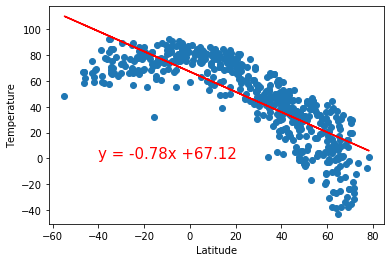

In [18]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression